In [1]:
# Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Reading the dataset

dataset = pd.read_csv('diabetes.csv')

In [3]:
# Taking a look at the dataset

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset_features = dataset.iloc[:,:-1]    # Excluding the class label
dataset_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
labels = dataset.iloc[:,-1]     # Labels/Targets
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [6]:
len(dataset_features)

768

### Performing the PCA and the plotting the data into a 2-D space using a scatter plot -

[[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]]
[2.09711056 1.73346726]


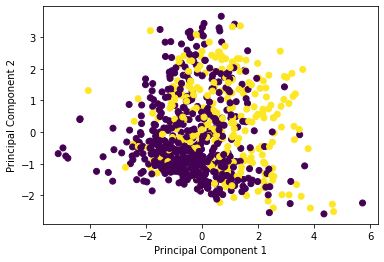

In [13]:
pca = PCA(n_components=2)
X = dataset_features.to_numpy()
X = (X - X.mean(axis = 0))/X.std(axis = 0)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)
P = pca.transform(X)
y = labels.to_numpy()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.scatter(P[:,0], P[:,1], c = y)

Taking a look at the Principal Components -

In [8]:
P

array([[ 1.06850273,  1.23489499],
       [-1.12168331, -0.73385167],
       [-0.39647671,  1.59587594],
       ...,
       [-0.28347525,  0.09706503],
       [-1.06032431,  0.83706234],
       [-0.83989172, -1.15175485]])

### Changing colors of the scatter plot so that - 
#### Green: Non-Diabetic
#### Red: Diabetic

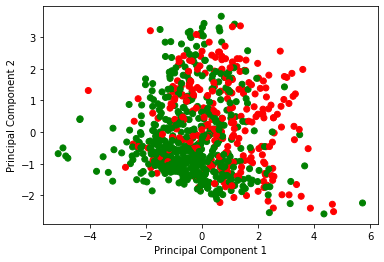

In [14]:
colors = []
colorized = {0: "green", 1: "red"}
for c in np.nditer(y):
    colors.append(colorized[int(c)])
    

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.scatter(P[:,0], P[:,1], c = colors)

### What PCA signifies -

Implementing PCA we actually select the principal components based on those eigenvectors of the Covariance matrix that have the highest eigenvalues. After we've made a Covariance Matrix of the features, corresponding to each feature we'll have an eigenvector. Eigenvectors are essentially the directions of the axes where variance is the highest. Each eigenvector has a coefficient attached to it, known as its eigenvalue. By ranking the eigenvectors in order of their eigenvalues, highest to lowest, we get the prinicipal components in the order of significance. Data-wise what this means is that the highest one holds the most amount of information about the data and the lowest one, least. So in PCA we focus on the top 'n' components and select them to get our data in a reduced dimension. In this case, we're using 2 components, so the principal components will be derived from the eigenvectors with the two highest eigenvalues.